# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress
import pandas as pd
import requests
import gzip
import shutil
import json

## Generate Cities List

In [2]:
url = "http://bulk.openweathermap.org/sample/city.list.json.gz"
myFile = requests.get(url)
open('cities.gz', 'wb').write(myFile.content)
with gzip.open('cities.gz', 'rb') as fileIn:
    with open('cities.json', 'wb') as fileOut:
        shutil.copyfileobj(fileIn, fileOut)
cityIDs = []        
with open('cities.json', encoding='utf-8') as file:
    cities = json.load(file)
    for count in range(600):
        cityIDs.append(cities[random.randint(0,len(cities))]["id"])
print(cityIDs)

[863883, 3114936, 2659977, 3022285, 1263021, 8077658, 3667983, 2763176, 1679796, 2818350, 1646523, 541791, 3164359, 1787948, 3447861, 6535594, 6550147, 6550390, 174972, 3175230, 251366, 591956, 2955868, 6824333, 3174096, 3461289, 6358668, 2808686, 2821617, 3451181, 641661, 6554641, 1337179, 2875477, 3113768, 7081642, 2176330, 3171942, 2524690, 3979840, 2738208, 437241, 1680441, 3674161, 2892867, 3182225, 2928717, 1794234, 1848938, 8140653, 3112325, 1004962, 1279219, 1679879, 6536820, 2110579, 4308122, 4314047, 2270184, 4951133, 2660961, 2144941, 1261806, 7602483, 2160273, 7871575, 1516601, 3193425, 6361500, 523161, 3164222, 3167331, 8010761, 2852995, 3109932, 6555232, 2895246, 6445990, 2946950, 4466604, 3018935, 6456646, 3201896, 2866966, 4003677, 4539557, 560852, 3036879, 3063033, 673594, 3836772, 3173189, 2976612, 3006531, 2964913, 3020094, 727462, 2851491, 3873369, 7300087, 130216, 1268024, 2857647, 2825761, 3029212, 3386372, 6437380, 1965338, 3128272, 6435099, 3595329, 2833893, 368

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
citiesData = []
data = pd.DataFrame()
print("Beginning Data Retrieval")
print("-----------------------------")
for x in range(600):
    query_url = f"http://api.openweathermap.org/data/2.5/weather?id={cityIDs[x]}&appid={weather_api_key}&units=imperial"
    response = requests.get(query_url).json()
    citiesData.append({'City' : response['name'],
                       'Lat' : response['coord']['lat'],
                       'Lng' : response['coord']['lon'],
                       'Max Temp' : response['main']['temp_max'],
                       'Humidity' : response['main']['humidity'],
                       'Cloudiness' : response['clouds']['all'],
                       'Wind Speed' : response['wind']['speed'],
                       'Country' : response['sys']['country'],
                       'Date' : response['dt']})
    print(f"Processing Record {x+1} of Set {1} | City ID: {cityIDs[x]} | City Name: {citiesData[x]['City']}")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | City ID: 863883 | City Name: Ohrid
Processing Record 2 of Set 1 | City ID: 3114936 | City Name: Oristà
Processing Record 3 of Set 1 | City ID: 2659977 | City Name: Le Châtelard
Processing Record 4 of Set 1 | City ID: 3022285 | City Name: Croth
Processing Record 5 of Set 1 | City ID: 1263021 | City Name: Mīrānpur Katra
Processing Record 6 of Set 1 | City ID: 8077658 | City Name: Sumurgeneng
Processing Record 7 of Set 1 | City ID: 3667983 | City Name: Sincelejo
Processing Record 8 of Set 1 | City ID: 2763176 | City Name: Ulrichsberg
Processing Record 9 of Set 1 | City ID: 1679796 | City Name: Viriato
Processing Record 10 of Set 1 | City ID: 2818350 | City Name: Unterwürschnitz
Processing Record 11 of Set 1 | City ID: 1646523 | City Name: Cilawu
Processing Record 12 of Set 1 | City ID: 541791 | City Name: Krasnyye Chetai
Processing Record 13 of Set 1 | City ID: 3164359 | City Name: Vignale
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
citiesDF = pd.DataFrame(citiesData)
citiesDF.to_csv('cities.csv', encoding='utf-8', index=True)
citiesDF.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ohrid,41.13,20.87,70.41,51,29,7.14,MK,1601735065
1,Oristà,41.93,2.07,60.01,67,51,1.99,ES,1601735065
2,Le Châtelard,46.45,6.90,53.01,81,64,4.00,CH,1601735065
3,Croth,48.85,1.38,55.40,71,90,9.17,FR,1601735065
4,Mīrānpur Katra,28.03,79.65,82.20,44,0,4.14,IN,1601735065


In [9]:
citiesDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,33.891283,21.576133,63.126467,74.290000,61.568333,7.643333,1.601661e+09
std,23.787263,61.400166,11.103809,19.941381,34.991370,5.233004,3.287787e+01
min,-42.770000,-149.950000,28.720000,6.000000,0.000000,0.070000,1.601661e+09
25%,26.562500,-0.450000,55.400000,64.000000,32.750000,3.420000,1.601661e+09
50%,43.680000,10.175000,61.000000,80.000000,75.000000,6.930000,1.601661e+09
75%,49.437500,39.075000,69.970000,89.000000,93.000000,10.290000,1.601661e+09
max,63.050000,174.450000,106.430000,100.000000,100.000000,34.450000,1.601661e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
citiesDFClean = citiesDF.loc[citiesDF['Humidity'] < 100]
citiesDFClean.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,34.030806,20.140771,63.097215,72.984238,61.166375,7.642925,1.601661e+09
std,23.996547,61.096530,11.192995,19.558946,35.224672,5.049062,3.199815e+01
min,-42.770000,-149.950000,28.720000,6.000000,0.000000,0.070000,1.601661e+09
25%,27.340000,-0.615000,55.400000,63.000000,31.000000,3.510000,1.601661e+09
50%,43.700000,10.100000,61.000000,77.000000,75.000000,6.930000,1.601661e+09
75%,49.725000,37.725000,69.980000,87.000000,93.500000,10.290000,1.601661e+09
max,63.050000,174.450000,106.430000,99.000000,100.000000,31.090000,1.601661e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

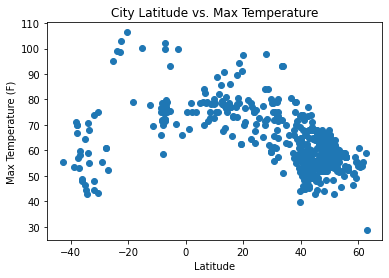

In [13]:
plt.scatter(citiesDFClean['Lat'], citiesDFClean['Max Temp'])
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('Figures/latTemp.png')

## Latitude vs. Humidity Plot

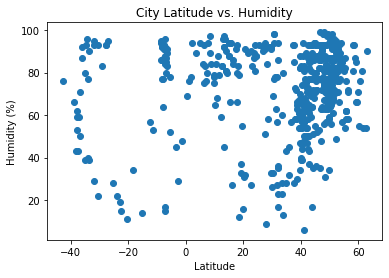

In [14]:
plt.scatter(citiesDFClean['Lat'], citiesDFClean['Humidity'])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Figures/latHum.png')

## Latitude vs. Cloudiness Plot

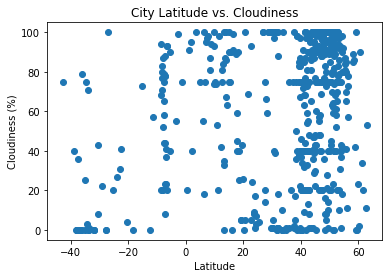

In [15]:
plt.scatter(citiesDFClean['Lat'], citiesDFClean['Cloudiness'])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Figures/latCloud.png')

## Latitude vs. Wind Speed Plot

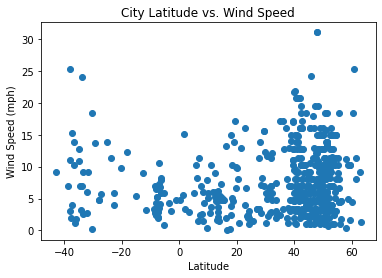

In [16]:
plt.scatter(citiesDFClean['Lat'], citiesDFClean['Wind Speed'])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Figures/latSpeed.png')

## Linear Regression

In [17]:
northernHemp = citiesDFClean.loc[citiesDFClean['Lat'] >= 0]
southernHemp = citiesDFClean.loc[citiesDFClean['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4633456580963583


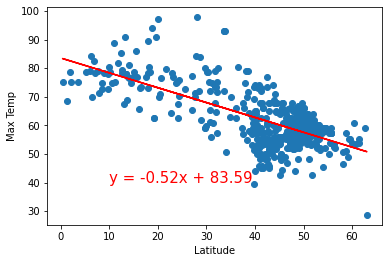

In [18]:
xValues = northernHemp['Lat']
yValues = northernHemp['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28806126300865287


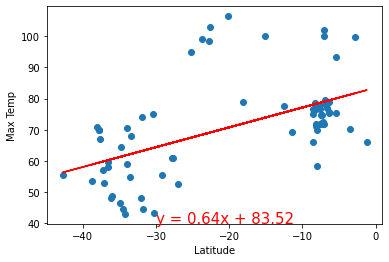

In [19]:
xValues = southernHemp['Lat']
yValues = southernHemp['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004189081361433191


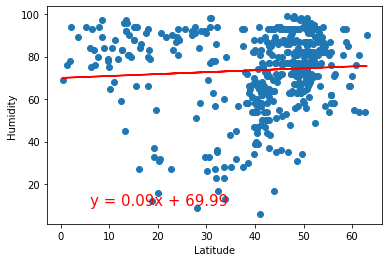

In [20]:
xValues = northernHemp['Lat']
yValues = northernHemp['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.020030908990472593


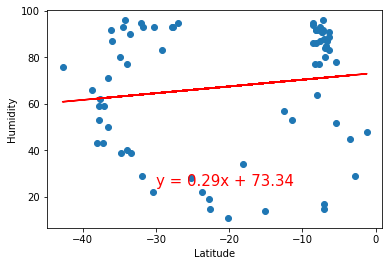

In [21]:
xValues = southernHemp['Lat']
yValues = southernHemp['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013387496655091737


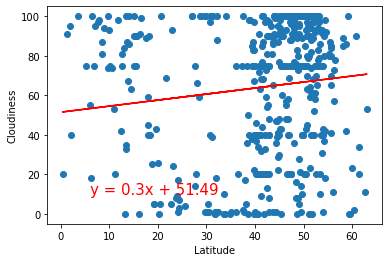

In [22]:
xValues = northernHemp['Lat']
yValues = northernHemp['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3069694236517712


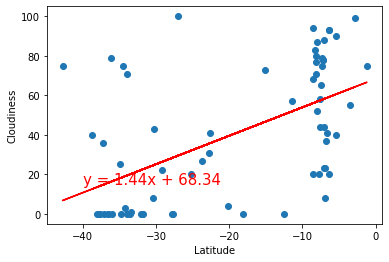

In [23]:
xValues = southernHemp['Lat']
yValues = southernHemp['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024241888502236214


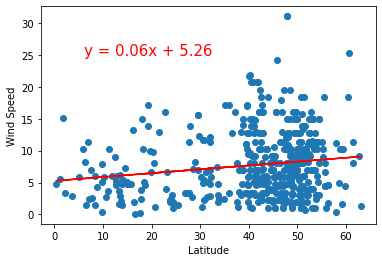

In [24]:
xValues = northernHemp['Lat']
yValues = northernHemp['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14074292996617982


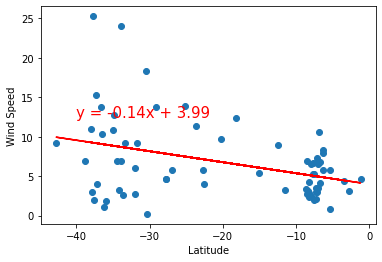

In [25]:
xValues = southernHemp['Lat']
yValues = southernHemp['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(-40,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")